# StartStopCut use example

This algorithm outputs if there is a cut at the beginning or at the end of the audio by locating the first and last non-silent frames and comparing their positions to the actual beginning and end of the audio. The input audio is considered to be cut at the beginning (or the end) and the corresponding flag is activated if the first (last) non-silent frame occurs before (after) the configurable time threshold.

    Notes: This algorithm is designed to operate on the entire (file) audio. In the streaming mode, use it in combination with RealAccumulator. The encoding/decoding process of lossy formats can introduce some padding at the beginning/end of the file. E.g. an MP3 file encoded and decoded with LAME using the default parameters will introduce a delay of 1104 samples [http://lame.sourceforge.net/tech-FAQ.txt]. In this case, the maximumStartTime can be increased by 1104 ÷ 44100 × 1000 = 25 ms to prevent misdetections.

In [5]:
import essentia.standard as es
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio 
from essentia import array as esarr
plt.rcParams["figure.figsize"] =(12,9)

In [19]:
def compute(x, frame_size=1024, hop_size=512, **kwargs):
    startStopCut = es.StartStopCut(frameSize=frame_size,
                                     hopSize=hop_size, 
                                     **kwargs)

    startCut, stopCut = startStopCut(esarr(x))
    
    if startCut:
        startColor = 'r'
    else:
        startColor = 'g'    

    if stopCut:
        stopColor = 'r'
    else:
        stopColor = 'g'    
    

    return startColor, stopColor

# Running the algorithm

This algorithm is used to assess is a certain silence margin is left at the beginning or end of the audio files. In the following examples, a green line is drawn when the margin is enough (i.e, no cuts) and a red one is drawn if it is not enough.

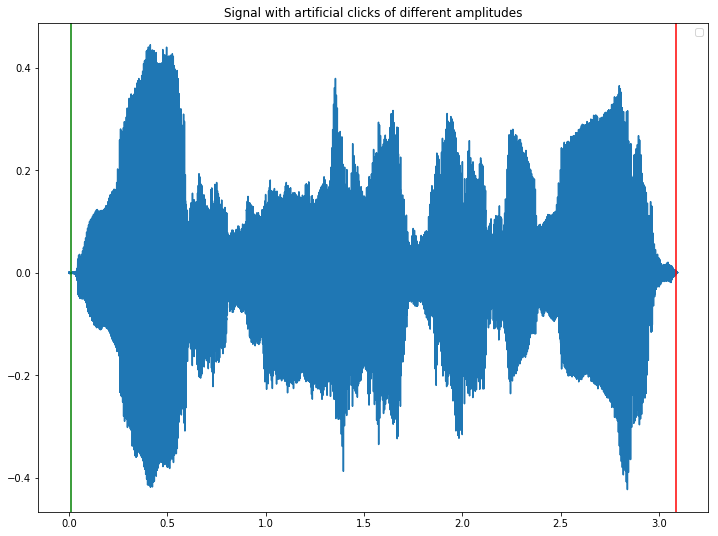

In [34]:
fs = 44100.
audio_dir = '../../audio/'
audio = es.MonoLoader(filename='{}/{}'.format(audio_dir,
                      'recorded/vignesh.wav'),
                      sampleRate=fs)()

songDuation = len(audio) / fs
times = np.linspace(0, len(audio) / fs, len(audio))
plt.plot(times, audio)

plt.title('Signal with artificial clicks of different amplitudes')

startColor, stopColor = compute(audio, threshold=-48)


plt.axvline(0.01, color=startColor)
plt.axvline(songDuation - 0.01, color=stopColor)

plt.legend()

In [35]:
Audio(audio, rate=fs)

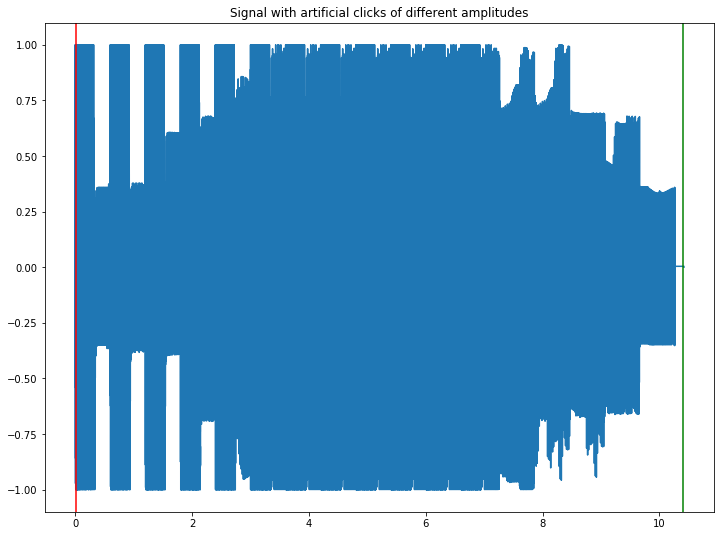

In [36]:
fs = 44100.
audio_dir = '../../audio/'
audio = es.MonoLoader(filename='{}/{}'.format(audio_dir,
                      'recorded/distorted.wav'),
                      sampleRate=fs)()

songDuation = len(audio) / fs
times = np.linspace(0, len(audio) / fs, len(audio))
plt.plot(times, audio)

plt.title('Signal with artificial clicks of different amplitudes')

startColor, stopColor = compute(audio, threshold=-48)


plt.axvline(0.01, color=startColor)
plt.axvline(songDuation - 0.01, color=stopColor)

In [37]:
Audio(audio, rate=fs)

# The parameters
this is an explanation of the most relevant parameters of the algorithm

- **maximumStartTime and maximumStopTime.** The minimum silence margins at the beginning and end in order to be considered free of cuts.

- **threshold.**  The threshold below which average energy is defined as silence.
